Part c1. use pure tensorflow tensor datastructure to build the same - do not use the auto differentiation yet.

# Import libraries

In [1]:
pip install tsne

     |████████████████████████████████| 552kB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp37-cp37m-linux_x86_64.whl size=260484 sha256=7cb2888e5fa6ddecbbce1f865e9cd913443972bbd8c64b1bd8c6237a3b9966e7
  Stored in directory: /root/.cache/pip/wheels/3e/d6/fc/58392f18ea8fc4c74e20185d2faeee87a1c1924a182606c6cd
Successfully built tsne


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Declare Custom Model

In [ ]:
class CustomModel(keras.Model):
  def train_step(self, data):
    # Unpack the data. Its structure depends on your model and
    # on what you pass to `fit()`.
    x, y = data
    with tf.GradientTape() as tape:
      y_pred = self(x, training=True)  # Forward pass
      # Compute the loss value
      # (the loss function is configured in `compile()`)
      loss = self.compiled_loss(y, y_pred,
                                regularization_losses=self.losses)
    # Compute gradients
    trainable_vars = self.trainable_variables
    gradients = tape.gradient(loss, trainable_vars)
    # Update weights
    self.optimizer.apply_gradients(zip(gradients, trainable_vars))
    # Update metrics (includes the metric that tracks the loss)
    self.compiled_metrics.update_state(y, y_pred)
    # Return a dict mapping metric names to current value
    return {m.name: m.result() for m in self.metrics}

# Plot Model

In [ ]:
#Plot using TSNE
from tsne import bh_sne
def tsne_plot(x_tensor, y_true_tensor):
  vis_data = bh_sne(x_tensor)
  # plot the result
  vis_x = vis_data[:, 0]
  vis_y = vis_data[:, 1]
  plt.scatter(vis_x, vis_y, c=y_true_tensor, cmap=plt.cm.get_cmap("jet", 10))
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  plt.show()

# Call Without Auto Differential

Model: "custom_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
regression (Dense)           (None, 2)                 22        
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________
None
<BatchDataset shapes: ((None, 3), (None, 2)), types: (tf.float64, tf.float64)>
Epoch 1/20
20/20 [==============================] - 0s 1ms/step - loss: 103.4040
Epoch 2/20
20/20 [==============================] - 0s 1ms/step - loss: 8.7045
Epoch 3/

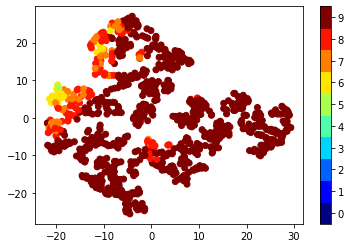

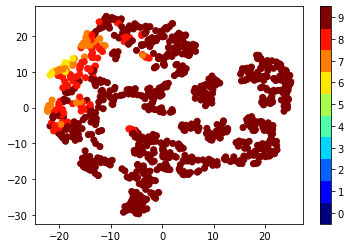

In [ ]:
d = 3
n = 1000
#y = xw + b
x = np.random.uniform(-1, 1, (n,d))
weights_true = np.array([ [2,-1,1] , [1,-1,1] ]).T
bias_true = np.array([10])
y_true = (x**3) @ weights_true + (x**2) @ weights_true + x @ weights_true + bias_true
x_tensor = tf.convert_to_tensor(x)
y_true_tensor = tf.convert_to_tensor(y_true)

# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(3,))
l1 = layers.Dense(20, activation="relu", name="dense_1")(inputs)
l2 = layers.Dense(10, activation="relu", name="dense_2")(l1)
outputs = layers.Dense(2, name='regression')(l2)
model = CustomModel(inputs, outputs)
print(model.summary())
model.compile(optimizer='sgd', loss='mse')
 

#Create a dataset object from the x and y value
dataset = tf.data.Dataset.from_tensor_slices((x_tensor, y_true_tensor))
dataset = dataset.shuffle(buffer_size=1024).batch(50)
print(dataset)

# Just use `fit` as usual
model.fit(dataset, epochs=20)
tsne_plot(x, y_true[:,0])
tsne_plot(x, y_true[:,1])